In [290]:
import os
import re
import numpy as np 
import time
import matplotlib.pyplot as plt 
import random
colores_rutas = ['green', 'orange', 'purple', 'brown', 'pink', 'blue', 'black', 'red', 'yellow', 'grey']

In [291]:
with open ("INSTANCES/F/F12.vrp") as archivo:
    nomb = ""
    dim = 0
    veh = 0
    cap = 0
    autos = []
    x_coord = []
    y_coord = []
    dema = {}  
    coordenadas = False  
    demandas = False  
    
    for linea in archivo:

        if linea.startswith("NAME"):
            nomb = (linea.strip().split(":")[1]).strip() + ".vrp"

        if linea.startswith("COMMENT"):
            resultado = re.search(r'of trucks:\s*(\d+)', linea, re.IGNORECASE)
            if resultado:
                veh = int(resultado.group(1))

        if linea.startswith("VEHIC"):
            veh = int(linea.strip().split(":")[1])
                
        if linea.startswith("DIMEN"):
            dim = int(linea.strip().split(":")[1])

        elif linea.startswith("CAPAC"):
            cap = int(linea.strip().split(":")[1])

        elif linea.startswith("NODE_COORD_SECTION"):
            coordenadas = True
            continue

        elif linea.startswith("DEMAND_SECTION"):
            coordenadas = False
            demandas = True
            continue

        elif linea.startswith("DEPOT_SECTION"):
            demandas = False

        elif coordenadas:
            coords = linea.split()
            if len(coords) >= 3:  
                x_coord.append(float(coords[1]))
                y_coord.append(float(coords[2]))

        elif demandas:
            demands = linea.split()
            if len(demands) >= 2:
                nodo, dem = int(demands[0]), int(demands[1])
                dema[nodo - 1] = dem  

for i in range(veh):
    autos.append(i+1)
        
cap_x_veh = {i: cap for i in range(1, veh + 1)}

In [292]:
n = dim

clientes = [i for i in range(n)]
arcos = [(i,j) for i in range(n) for j in range(n) if i!=j]

vehiculos = veh
capacidad = cap
q = dema

x = x_coord
y = y_coord

In [293]:
distancia = {(i,j): np.hypot(x[i] - x[j], y[i] - y[j]) for i,j in arcos}

In [295]:
def asignar_sublistas(clientes, demanda, vehiculos, capacidad):
    # Ordenar clientes por demanda en orden descendente
    clientes_ordenados = sorted(clientes, key=lambda x: demanda[x], reverse=True)
    
    # Inicializar listas para asignar clientes a cada vehículo
    asignaciones = [[] for _ in range(vehiculos)]
    capacidad_actual = [0] * vehiculos
    
    # Asignar clientes a vehículos cumpliendo con la capacidad
    for cliente in clientes_ordenados:
        # Encontrar vehículo con capacidad disponible
        vehiculo_disponible = max(range(vehiculos), key=lambda v: capacidad_actual[v])
        
        # Verificar si la asignación cumple con la capacidad del vehículo
        if capacidad_actual[vehiculo_disponible] + demanda[cliente] <= capacidad:
            asignaciones[vehiculo_disponible].append(cliente)
            capacidad_actual[vehiculo_disponible] += demanda[cliente]
        else:
            # Buscar otro vehículo con capacidad disponible
            vehiculo_disponible = min(range(vehiculos), key=lambda v: capacidad_actual[v])
            asignaciones[vehiculo_disponible].append(cliente)
            capacidad_actual[vehiculo_disponible] += demanda[cliente]

    # Eliminar el 0 de cada lista y colocar un 0 al inicio de cada lista
    asignaciones = [[0] + [cliente for cliente in sublist if cliente != 0] for sublist in asignaciones]
    
    return asignaciones


rutas = asignar_sublistas(clientes, q, vehiculos, capacidad)

rutas

[[0, 95, 30, 127, 6],
 [0,
  132,
  80,
  106,
  66,
  19,
  49,
  77,
  115,
  18,
  118,
  99,
  86,
  8,
  20,
  45,
  64,
  54,
  17,
  53,
  92,
  104],
 [0,
  120,
  82,
  2,
  121,
  46,
  39,
  23,
  126,
  37,
  97,
  7,
  26,
  44,
  10,
  21,
  51,
  72,
  94,
  50,
  89,
  98],
 [0,
  83,
  71,
  48,
  107,
  123,
  100,
  22,
  78,
  84,
  28,
  32,
  43,
  87,
  11,
  36,
  56,
  73,
  15,
  31,
  60,
  88,
  96],
 [0,
  114,
  52,
  110,
  74,
  103,
  81,
  69,
  102,
  65,
  5,
  109,
  27,
  63,
  4,
  14,
  40,
  61,
  122,
  29,
  59,
  70,
  134],
 [0,
  33,
  113,
  67,
  47,
  111,
  128,
  129,
  125,
  35,
  24,
  91,
  1,
  76,
  90,
  16,
  41,
  62,
  57,
  25,
  55,
  119,
  133],
 [0,
  108,
  131,
  130,
  68,
  112,
  117,
  105,
  124,
  3,
  42,
  12,
  9,
  101,
  13,
  38,
  58,
  75,
  79,
  34,
  85,
  93,
  116]]

In [296]:
def calcular_distancia_ruta(ruta, distancia):
    distancia_total = 0
    for i in range(len(ruta) - 1):
        distancia_total += distancia[(ruta[i], ruta[i + 1])]
    return distancia_total

# Calcular distancias para cada ruta
distancias_rutas = [calcular_distancia_ruta(ruta, distancia) for ruta in rutas]

# Imprimir las distancias de cada ruta
for i, distancia_ruta in enumerate(distancias_rutas):
    print(f"Distancia de la Ruta {i + 1}: {distancia_ruta}")

# Calcular la sumatoria de las distancias de todas las rutas
distancia_total = sum(distancias_rutas)


print(f"\nSuma Total de Distancias: {distancia_total}")

Distancia de la Ruta 1: 248.79089602688788
Distancia de la Ruta 2: 955.1806487195337
Distancia de la Ruta 3: 919.6183189831391
Distancia de la Ruta 4: 790.1724533431114
Distancia de la Ruta 5: 1478.9747402344885
Distancia de la Ruta 6: 626.1413262306087
Distancia de la Ruta 7: 1003.773734115256

Suma Total de Distancias: 6022.652117653026


In [297]:
time_i = time.time()

#Implementacion de Local Seach
def Local_Search(NN,distancia):

    min_cambio = 0

    for i in range(len(NN)-2):
        for j in range(i+2, len(NN)-1):
            
            costo_actual = distancia[(NN[i], NN[i+1])] + distancia[(NN[j], NN[j+1])]
            costo_nuevo = distancia[(NN[i], NN[j])] + distancia[(NN[i+1], NN[j+1])]
            
            cambio = costo_nuevo - costo_actual

            if cambio < min_cambio:
                min_cambio = cambio
                min_i = i
                min_j = j

    if min_cambio < 0:
         NN[min_i +1:min_j+1]=NN[min_i+1:min_j+1][::-1]

    return NN


In [298]:
# Inicialización de Local
contador = 0

# Ejecución del Algoritmo con Local Search
while True:
    contador += 1
    primera = sum([calcular_distancia_ruta(ruta, distancia) for ruta in rutas])
    
    # Aplicar Local_Search a cada ruta generada
    for i in range(len(rutas)):
        ruta_anterior = rutas[i].copy()
        rutas[i] = Local_Search(rutas[i], distancia)
        dist_actual = calcular_distancia_ruta(ruta_anterior, distancia)
        dist_nueva = calcular_distancia_ruta(rutas[i], distancia)

    ultima = sum([calcular_distancia_ruta(ruta, distancia) for ruta in rutas])
    intercambio = np.abs(ultima - primera)

    # Salir del bucle si no se realizaron cambios en ninguna ruta
    if intercambio == 0:
        break

time_f = time.time()
fin_timeLocal = time_f - time_i

# Imprimir resultados
print("Solucion", rutas)
print("Distancia Total", sum([calcular_distancia_ruta(ruta, distancia) for ruta in rutas]))
print("Total de Intentos", contador)
print(f"\nTiempo de ejecucion de Local Search: {fin_timeLocal}")

Solucion [[0, 127, 30, 95, 6], [0, 118, 66, 17, 18, 19, 115, 106, 132, 80, 64, 77, 49, 53, 54, 92, 20, 86, 8, 45, 99, 104], [0, 46, 126, 121, 120, 82, 21, 23, 72, 50, 51, 26, 89, 10, 7, 2, 44, 94, 39, 37, 97, 98], [0, 22, 28, 31, 60, 48, 32, 73, 78, 71, 123, 107, 83, 84, 87, 88, 15, 11, 43, 36, 100, 56, 96], [0, 65, 114, 109, 122, 110, 81, 69, 70, 63, 52, 102, 103, 40, 4, 5, 14, 29, 27, 59, 61, 74, 134], [0, 91, 24, 25, 90, 16, 41, 35, 57, 55, 62, 1, 47, 76, 119, 113, 129, 128, 125, 111, 33, 67, 133], [0, 85, 13, 12, 9, 42, 3, 38, 93, 105, 101, 58, 75, 34, 79, 68, 112, 124, 108, 131, 130, 117, 116]]
Distancia Total 2659.486851357773
Total de Intentos 22

Tiempo de ejecucion de Local Search: 0.03486442565917969


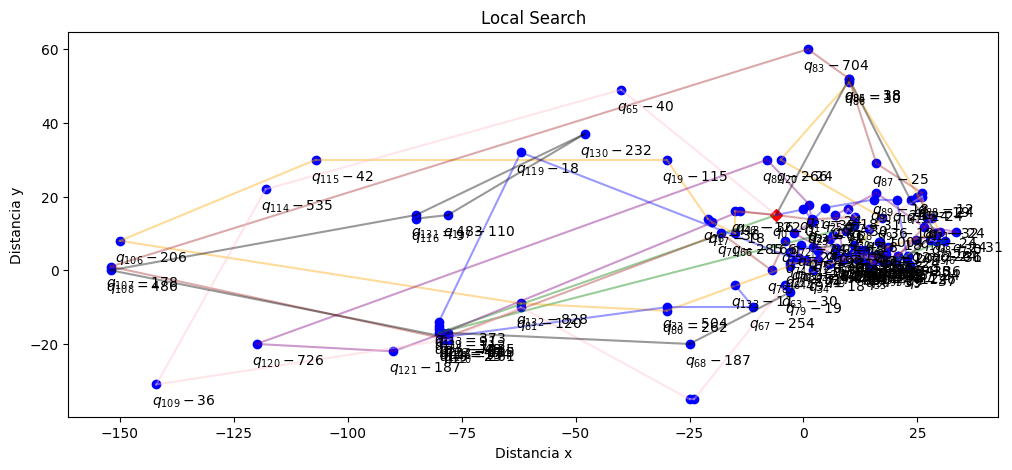

In [299]:
# Grafico
plt.figure(figsize=(12, 5))

# Puntos
plt.scatter(x, y, color='blue')

# DC
plt.scatter(x[0], y[0], color='red', marker='D')

# Clientes y demanda
for i in clientes:
    plt.annotate('$q_{%d} - %d$' % (i, q[i]), (x[i] - 1, y[i] - 5.5))

# Rutas
for r in range(len(rutas)):
    color_ruta = colores_rutas[r % len(colores_rutas)]  # Ciclo de colores para las rutas
    for n in range(len(rutas[r]) - 1):
        i = rutas[r][n]
        j = rutas[r][n + 1]
        plt.plot([x[i], x[j]], [y[i], y[j]], alpha=0.4, color=color_ruta)

plt.xlabel("Distancia x")
plt.ylabel("Distancia y")
plt.title("Local Search")

plt.show()